# Python pour biochimistes: programmation orientée-objet et création de graphes

## Introduction

Une autre tâche courante est l'extraction de données tabulées à partir de fichiers `.csv` (*comma-spaced values*) ou `.xls/.xslx` (MS Excel) pour faire des calculs ou bien pour faire des graphiques. Python possède trois librairies très puissantes pour réussir ces tâches:

- [Numpy](https://numpy.org), une puissante librairie pour des calculs et des analyses statistiques | [Documentation](https://numpy.org/doc/stable/)
- [Pandas](https://pandas.pydata.org), augmente la puissance de Numpy en ajoutant encore plus de fonctions | [Documentation](https://pandas.pydata.org/docs/)
- [Matplotlib](https://matplotlib.org), une librairie spécialisée pour la présentation graphique des analyses numériques | [Documentation](https://matplotlib.org/3.8.2/index.html)

## Pré-requis

Il faut s'assurer d'avoir les modules nécessaires dans notre environnement:

In [2]:
!pip install numpy pandas matplotlib openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 3.0 MB/s eta 0:00:0000:0100:01


### Démonstration

Pandas permet la création deux types d'objets:

- Des objets de la classe `Series`, tout à fait semblables à des listes;
- Des objets de la classe `DataFrame` qui sont comme des matrices de données bidimensionnelles, avec rangées et colonnes.

C'est sur ces objets que nous pourrons faire nos tâches grâce aux méthodes qui leur sont associé.

In [3]:
import pandas as pd
import matplotlib as mpl

#
# Utilitaire de lecture des fichiers MS Excel directement
#
# Remarque: on peut spécifié la feuille désirée 
#
dataF = pd.read_excel("../z.misc_files/data_tab/notes_examen.xlsx")
print(dataF)

#
# Obtenir le nom des colonnes. 
#
headers = dataF.columns.values
#
# headers est une liste
#
print("Noms des colonnes:")
for i in headers:
    print("=> " + i)

#
# la méthode shpae retourne la dimensionalité de la matrice de données
# [0] est le nombre de rangées, sans la ligne des noms de colonnes;
# [1] est le nombre de colonnes
#
print("=> Nbre d'etudiants:" + str(dataF.shape[0]))
print("=> Nbre de colonnes de données:" + str(dataF.shape[1]))

# Un seul élément par recherche ordinale
print("Résultat de l'examen I (methode ordinale): "+str(dataF.iloc[0,2]))
# Un seul élément par recherche explicite
print("Résultat de l'examen I (recherche explicite): "+str(dataF.loc[0,"exam_1"]))

#
# Extraction d'une rangée par position ordinale
# Retourne une Serie, traitée comme une liste
#
row = dataF.iloc[1]
print(row)
print(type(row))
#
# Extraction d'une rangée par recherche explicite
# Retourne un DataFrame comme résultat
row = dataF.loc[(dataF["nom"] == "Jones") & (dataF["prenom"] == "Henry")]
print(row)
print(type(row))

           nom   prenom  exam_1  exam_2  exam_3
0        Jones     Indy      90      72      58
1        Jones    Henry      60      76      78
2        Vader    Darth      28      41      28
3     Empreror     Evil      39      47      30
4       Windhu     Mace      66      64      60
5       Kenobi  Obi-Wan      79      61      69
6    Skywalker     Luke      21      47      78
7        Brody   Marcus      70      53      64
8    Schneider     Elsa      21      25      34
9    Ravenwood   Marion      53      86      60
10      Belloq     Rene      20      50      36
11       Scott   Willie      72      90      61
12     Amidala    Padme      57      78      50
13       Round    Short      90      55      77
14      Spalko    Irina      30      24      60
15       Andor  Cassian      82      88      63
16        Solo      Han      74      59      64
17    Antilles    Wedge      81      85      63
18  Calrissian    Lando      77      66      63
19      Djarin      Din      56      81 

## Faire des calculs sur les DataFrame

Ok, comment utilisé un DataFrame? Calculons la moyenne de chaque examen ainsi que l'écart-type pour chacun.

In [1]:
import pandas as pd
import matplotlib as mpl

#
# Utilitaire de lecture des fichiers MS Excel directement
#
# Remarque: on peut spécifié la feuille désirée 
#
dataF = pd.read_excel("../z.misc_files/data_tab/notes_examen.xlsx")

#
# Simplement, utilisons les méthodes mean et std de pandas
# pour un seul examen
#
mean = dataF["exam_1"].mean()
std = dataF["exam_1"].std()
print("Moyenne de l'examen 1 avec ecart-type: " + str(mean) +"+/-"+str("{:.1f}".format(std)))
#
# Retourne un DataFrame 
#
stats = dataF.describe()
print(stats)

print("Moyenne de l'examen 1 avec ecart-type (describe): " + str(stats.loc["mean","exam_1"]) + "+/-" + str("{:.1f}".format(stats.loc["std","exam_1"])))

Moyenne de l'examen 1 avec ecart-type: 58.3+/-23.9
          exam_1    exam_2     exam_3
count  20.000000  20.00000  20.000000
mean   58.300000  62.40000  58.200000
std    23.923342  19.84519  15.143524
min    20.000000  24.00000  28.000000
25%    36.750000  49.25000  56.000000
50%    63.000000  62.50000  62.000000
75%    77.500000  78.75000  65.000000
max    90.000000  90.00000  78.000000
Moyenne de l'examen 1 avec ecart-type (describe): 58.3+/-23.9


## Création d'un graphique avec les données d'un DataFrame

Tentons quelque chose: un histogramme montrant la moyenne et l'écart-type pour chacun des examens d'une session 

          exam_1    exam_2     exam_3
count  20.000000  20.00000  20.000000
mean   58.300000  62.40000  58.200000
std    23.923342  19.84519  15.143524
min    20.000000  24.00000  28.000000
25%    36.750000  49.25000  56.000000
50%    63.000000  62.50000  62.000000
75%    77.500000  78.75000  65.000000
max    90.000000  90.00000  78.000000
58.3
Pas mal de base :-)


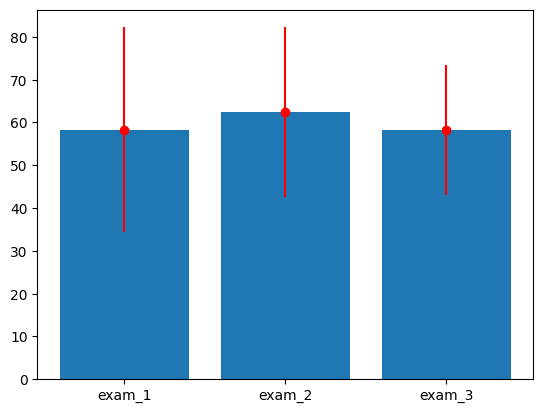

Un peu plus informatif...


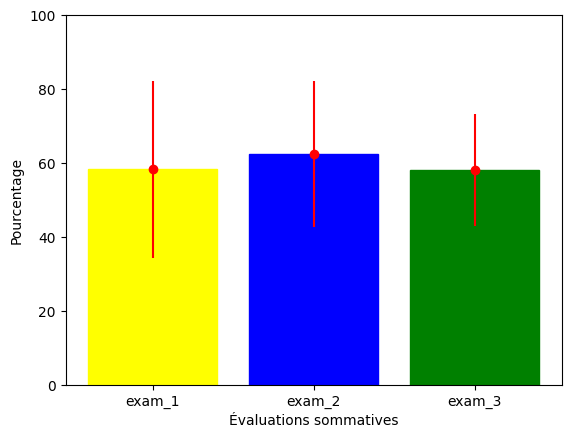

In [6]:
import pandas as pd
import matplotlib.pyplot as mpl

#
# Utilitaire de lecture des fichiers MS Excel directement
#
dataF = pd.read_excel("../z.misc_files/data_tab/notes_examen.xlsx")

#
# Retourne un DataFrame avec des statistiques descriptives
# du DataFrame global
#
stats = dataF.describe()
print(stats)
print(stats.loc["mean","exam_1"])

tests = ["exam_1","exam_2","exam_3"]

allMeans = []
allStds = []

for i in tests:
    allMeans.append(stats.loc["mean",i])
    allStds.append(stats.loc["std",i])

print("Pas mal de base :-)")
# Initialiser le graphe avec les tests et leurs valeurs moyennes
mpl.bar(tests,allMeans)
# Ajouter les écarts-types
mpl.errorbar(tests,allMeans, yerr=allStds, fmt="o", color="r")
# Afficher le graphe
mpl.show()

print("Un peu plus informatif...")
# Joujou avec les couleurs
# Initialiser le graphe avec les tests et leurs valeurs moyennes
bars = mpl.bar(tests,allMeans)
# Ajouter les écarts-types
errors = mpl.errorbar(tests,allMeans, yerr=allStds, fmt="o", color="r")
#
# On peut choisir la couleur de chaque colonne individuellement
#
bars[0].set_color("Yellow")
bars[1].set_color("Blue")
bars[2].set_color("Green")

mpl.xlabel("Évaluations sommatives")
mpl.ylabel("Pourcentage")
mpl.ylim(0,100)
mpl.savefig("../z.misc_files/data_misc/test_figure.jpg")
mpl.show()